# Implementation of ANN using keras

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras

In [13]:
print(tf.__version__)
print(keras.__version__)

2.20.0
3.11.3


# Simple classifier using keras on MNIST data

In [16]:
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 17s 1us/step


In [19]:
X_test.shape,X_train_full.dtype

((10000, 28, 28), dtype('uint8'))

In [22]:
print("Data Type of X_train_full is",X_train_full.dtype)

Data Type of X_train_full is uint8


In [30]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
y_test[0]

np.uint8(7)

In [29]:
len(X_test[0])

28

In [33]:
#creating validation dataset from full data
#scale the data between 0-1 by divide 255

X_valid,X_train = X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

#Scale the test dataset aslo

X_test = X_test/255

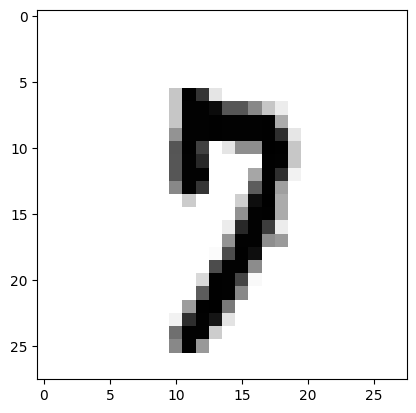

In [38]:
plt.imshow(X_train[25],cmap='binary')
plt.show()

<Axes: >

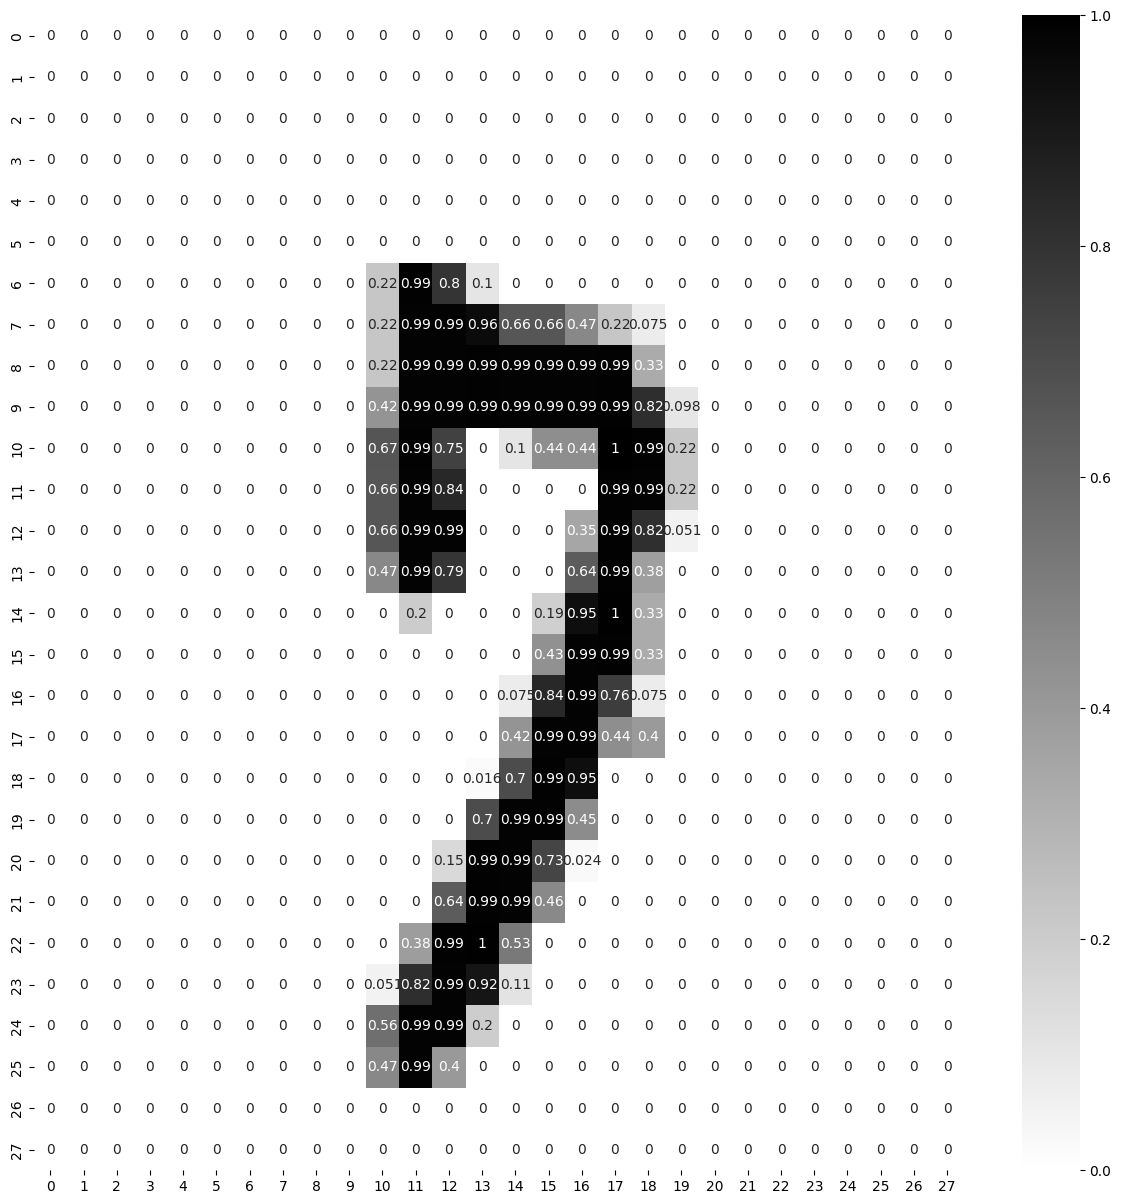

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[25],cmap='binary',annot=True)

In [47]:
#Creating layers for ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer'),
          tf.keras.layers.Dense(300,activation='relu',name='hiddelLayer1'),
          tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
          tf.keras.layers.Dense(10,activation='softmax',name='outerLayer')]

model_clf = tf.keras.models.Sequential(LAYERS)

In [48]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddelLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outerLayer, built=True>]

In [49]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddelLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outerLayer (Dense)              │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddelLayer1'

In [52]:
weights,biases = hidden1.get_weights()

In [54]:
print(weights.shape)

(784, 300)


In [60]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIER = 'SGD'
METRICS = ['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIER,metrics=METRICS)

In [61]:
#Training the model
EPOCHES = 10
VALIDITION_SET = (X_valid,y_valid)

history = model_clf.fit(X_train,y_train,epochs=EPOCHES,validation_data=VALIDITION_SET,batch_size=32)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8440 - loss: 0.6017 - val_accuracy: 0.9150 - val_loss: 0.3055
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9185 - loss: 0.2864 - val_accuracy: 0.9348 - val_loss: 0.2379
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9333 - loss: 0.2337 - val_accuracy: 0.9440 - val_loss: 0.1984
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9428 - loss: 0.2001 - val_accuracy: 0.9496 - val_loss: 0.1776
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9500 - loss: 0.1753 - val_accuracy: 0.9584 - val_loss: 0.1583
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9555 - loss: 0.1560 - val_accuracy: 0.9612 - val_loss: 0.1477
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9597 - loss: 0.1404 - val_accuracy: 0.9654 - val_loss: 0.1308
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9637 - loss: 0

In [62]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [63]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.843982,0.601653,0.9150,0.305487
1,0.918491,0.286416,0.9348,0.237861
2,0.933309,0.233705,0.9440,0.198356
3,0.942800,0.200059,0.9496,0.177624
4,0.949982,0.175332,0.9584,0.158256
5,0.955455,0.156029,0.9612,0.147738
6,0.959673,0.140380,0.9654,0.130809
7,0.963727,0.127414,0.9656,0.122732
8,0.966545,0.116053,0.9694,0.115709
9,0.969836,0.106966,0.9708,0.109056


<Axes: >

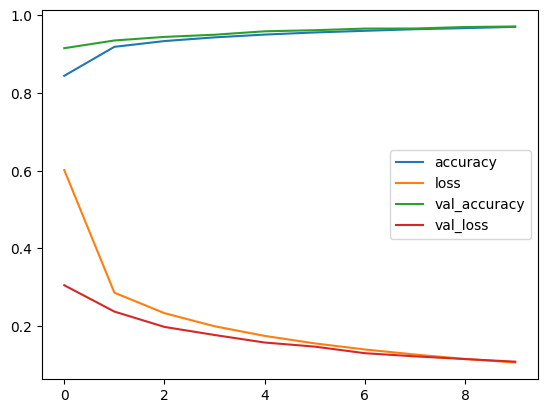

In [65]:
pd.DataFrame(history.history).plot()

In [66]:
# now evaluate the model
model_clf.evaluate(X_test,y_test)
                   

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9664 - loss: 0.1135


[0.11346953362226486, 0.9664000272750854]

In [67]:
X_new = X_test[:3]  #slicing the first three data for testing

In [70]:
actual = y_test[:3]
actual #actual value of above 3

array([7, 2, 1], dtype=uint8)

In [78]:
y_prob = model_clf.predict(X_new)
y_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[3.2692624e-05, 2.4435721e-07, 5.5161596e-04, 4.9549076e-03,
        1.1953898e-07, 6.1177961e-05, 1.9510766e-09, 9.9422175e-01,
        1.2146997e-05, 1.6536319e-04],
       [5.4756041e-05, 2.4665624e-04, 9.9038410e-01, 8.0733942e-03,
        3.9529477e-09, 4.6545122e-04, 4.7612889e-04, 1.0690679e-09,
        2.9946762e-04, 9.9816306e-09],
       [2.0533822e-05, 9.8979163e-01, 2.2475123e-03, 8.7166636e-04,
        3.6405108e-04, 9.4830332e-04, 7.8756304e-04, 3.4997880e-03,
        1.3162876e-03, 1.5255650e-04]], dtype=float32)

In [79]:
y_prob.round(3)  #roundoff the values

array([[0.   , 0.   , 0.001, 0.005, 0.   , 0.   , 0.   , 0.994, 0.   ,
        0.   ],
       [0.   , 0.   , 0.99 , 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.99 , 0.002, 0.001, 0.   , 0.001, 0.001, 0.003, 0.001,
        0.   ]], dtype=float32)

In [82]:
y_pred = np.argmax(y_prob, axis=-1)

In [84]:
y_pred #the actual values

array([7, 2, 1])

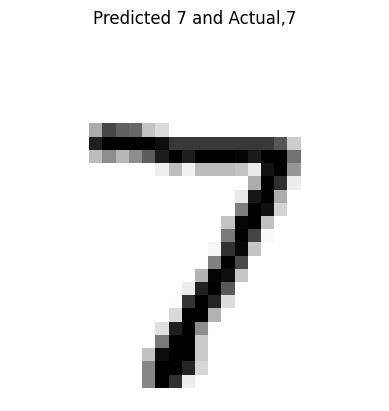

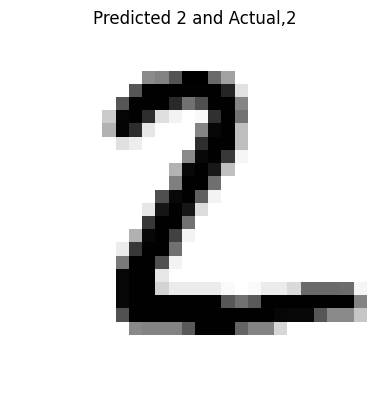

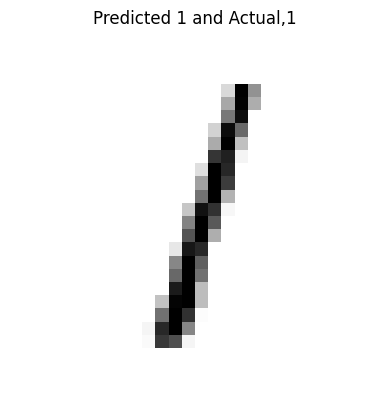

In [91]:
#now plot the values
for data,pred,actual_data in zip(X_new,y_pred,actual):
    plt.imshow(data,cmap='binary')
    plt.title(f'Predicted {pred} and Actual,{actual_data}')
    plt.axis('off')
    plt.show()